In [60]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [7]:
train_df = pd.read_excel('Downloads/SCS4204_IS4103_CS4104 _dataset.xlsx', sheet_name='Training Dataset', engine='openpyxl')
test_df = pd.read_excel('Downloads/SCS4204_IS4103_CS4104 _dataset.xlsx', sheet_name='Testing Dataset', engine='openpyxl')

# print training dataset header 
print(train_df.head())

   ID  Age  Gender    TB   DB  ALK SGPT SGOT   TP  ALB AG_Ratio Class
0   1   65  Female   0.7  0.1  187   16   18  6.8  3.3      0.9   Yes
1   2   62    Male  10.9  5.5  699   64  100  7.5  3.2     0.74   Yes
2   3   62    Male   7.3  4.1  490   60   68    7  3.3     0.89   Yes
3   4   58    Male     1  0.4  182   14   20  6.8  3.4        1   Yes
4   5   72    Male   3.9    2  195   27   59  7.3  2.4      0.4   Yes


In [8]:
# print testing dataset header
print(test_df.head())

   ID  Age  Gender    TB   DB  ALK SGPT SGOT   TP  ALB AG_Ratio Class
0   1   65  Female   0.7  0.1  187   16   18  6.8  3.3      0.9   Yes
1   2   62    Male  10.9  5.5  699   64  100  7.5  3.2     0.74   Yes
2   3   62    Male   7.3  4.1  490   60   68    7  3.3     0.89   Yes
3   4   58    Male     1  0.4  182   14   20  6.8  3.4        1   Yes
4   5   72    Male   3.9    2  195   27   59  7.3  2.4      0.4   Yes


In [9]:
# check whether we can access our dataframe using attribute name
print(train_df['Age'])

0      65
1      62
2      62
3      58
4      72
       ..
578    60
579    40
580    52
581    31
582    38
Name: Age, Length: 583, dtype: int64


In [37]:
# replacing missing values with mean values
zero_not_accepted = ['TB', 'DB', 'ALK', 'SGPT', 'SGOT', 'TP', 'ALB', 'AG_Ratio']
for column in zero_not_accepted:
    train_df[column] = train_df[column].replace('?', np.NAN) # replacing 0 into NA
    mean = int(train_df[column].mean(skipna= True))
    train_df[column] = train_df[column].replace(np.NAN, mean)

for column in zero_not_accepted:
    test_df[column] = test_df[column].replace('?', np.NAN) # replacing 0 into NA
    mean = int(test_df[column].mean(skipna= True))
    test_df[column] = test_df[column].replace(np.NAN, mean)
    
# Lavel Encoding -> Male vs Female
train_df['Gender'] = train_df['Gender'].replace('Male', 1)
train_df['Gender'] = train_df['Gender'].replace('Female', 0)
test_df['Gender'] = test_df['Gender'].replace('Male', 1)
test_df['Gender'] = test_df['Gender'].replace('Female', 0)

In [30]:
# check whether missing values have been replaced with the mean value
print(train_df.iloc[220:230,3])

220    0.8
221    0.9
222    0.9
223    1.1
224    1.7
225    0.6
226    1.3
227    3.0
228    1.0
229    0.6
Name: TB, dtype: float64


In [38]:
# split dataset for testing and training
train_x = train_df.iloc[:,1:11]
train_y = train_df.iloc[:, 11]
test_x = test_df.iloc[:,1:11]
test_y = test_df.iloc[:, 11]

In [39]:
print(train_x, test_x)

     Age  Gender    TB   DB    ALK  SGPT   SGOT   TP  ALB  AG_Ratio
0     65       0   0.7  0.1  187.0  16.0   18.0  6.8  3.3      0.90
1     62       1  10.9  5.5  699.0  64.0  100.0  7.5  3.2      0.74
2     62       1   7.3  4.1  490.0  60.0   68.0  7.0  3.3      0.89
3     58       1   1.0  0.4  182.0  14.0   20.0  6.8  3.4      1.00
4     72       1   3.9  2.0  195.0  27.0   59.0  7.3  2.4      0.40
..   ...     ...   ...  ...    ...   ...    ...  ...  ...       ...
578   60       1   0.5  0.1  500.0  20.0   34.0  5.9  1.6      0.37
579   40       1   0.6  0.1   98.0  35.0   31.0  6.0  3.2      1.10
580   52       1   0.8  0.2  245.0  48.0   49.0  6.4  3.2      1.00
581   31       1   1.3  0.5  184.0  29.0   32.0  6.8  3.4      1.00
582   38       1   1.0  0.3  216.0  21.0   24.0  7.3  4.4      1.50

[583 rows x 10 columns]      Age  Gender    TB   DB    ALK  SGPT   SGOT   TP  ALB  AG_Ratio
0     65       0   0.7  0.1  187.0  16.0   18.0  6.8  3.3      0.90
1     62       1  10.9 

In [40]:
print(train_y, test_y)

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
578     No
579    Yes
580    Yes
581    Yes
582     No
Name: Class, Length: 583, dtype: object 0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
306    Yes
307    Yes
308    Yes
309    Yes
310    Yes
Name: Class, Length: 311, dtype: object


In [41]:
# label encoding
le = LabelEncoder()
train_y = le.fit_transform(train_y)
test_y = le.fit_transform(test_y)

print(train_y, test_y)

[1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0
 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1
 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1
 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0
 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0
 1 1 0 1 1 1 1 0 0 1 0 1 

In [42]:
# defining the decision tree
dtree = DecisionTreeClassifier()
dtree.fit(train_x, train_y)
print('decision tree classifier created')

decision tree classifier created


In [43]:
# predicting the values of the test data
pred_y = dtree.predict(test_x)
print(pred_y)

[1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0
 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1
 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [44]:
len(pred_y)

311

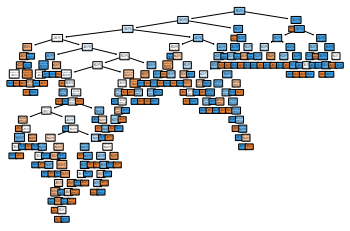

In [58]:
# visualising the decision tree
df_columns = train_df.columns
df_columns = train_df.columns[1:11]

dec_tree = plot_tree(decision_tree=dtree, feature_names=df_columns, class_names=['Yes', 'No'], filled=True, precision=4, rounded=
                    True)
plt.savefig('dt.png')

In [45]:
# confusion matrix
confusion_matrix = confusion_matrix(test_y, pred_y)
print(confusion_matrix)

[[ 89   1]
 [  5 216]]


In [61]:
# f1_score and accuracy score
print('f1_score : ', f1_score(test_y, pred_y))
print('accuracy score : ', accuracy_score(test_y, pred_y))

f1_score :  0.9863013698630136
accuracy score :  0.9807073954983923


                                        **Outputs of the confusion matrix**

In [46]:
TN = 89
TP = 216
FN = 5
FP = 1

In [ ]:
# Calculations have been done in the PDF file
Accuracy = 98.07 %
Precision = 99.54 %
Sensitivity = 97.74 %
Specificity = 98.89 %
Error Rate = 1.93 % 